# regplot using seaborn  
* <code>seaborn.regplot(x=, y=, data=,...)</code>
* [seaborn docs for regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html)  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

---------------

In [5]:
df=pd.read_csv("data\Compustat_from_1990.csv")[['fyear', 'tic', 'at', 'sale', 'mv']] # mv is already in million dollars.
df= df[df.fyear==2020]
df= df[df.mv>0]
df= df.sort_values('at', ascending= False).head(100)
print(df.shape)
df.head()

(100, 5)


,fyear,tic,at,sale,mv
5948,2020,BRK.B,873729.000,286256.000,536997.007800
159293,2020,VWAGY,599214.256,272127.944,104334.569976
84463,2020,TM,562983.000,246059.000,218167.978500
45556,2020,T,525761.000,171760.000,204941.516720
58668,2020,SHEL,379268.000,180543.000,136653.837600


In [6]:
# Divide columns by 1000 so that they are in billions
df[['at', 'sale', 'mv']]= df[['at', 'sale', 'mv']]/1000

# floats to int
df[['at', 'sale', 'mv']] =df[['at', 'sale', 'mv']].apply(np.int64)
df.head()

,fyear,tic,at,sale,mv
5948,2020,BRK.B,873,286,536
159293,2020,VWAGY,599,272,104
84463,2020,TM,562,246,218
45556,2020,T,525,171,204
58668,2020,SHEL,379,180,136


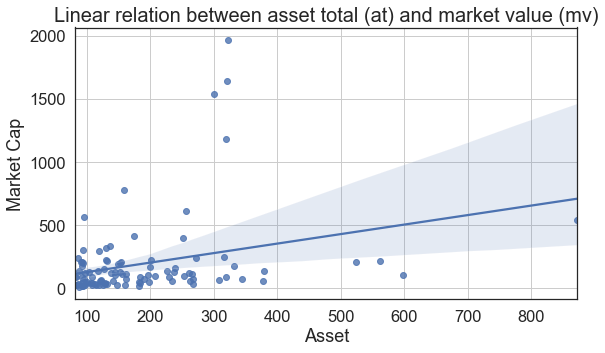

In [18]:
sns.set(font_scale=1.5)
sns.set_style('white')
ax= sns.regplot(data= df, x='at', y= 'mv')
ax.figure.set_size_inches(9, 5)
ax.grid()
ax.set_title("Linear relation between asset total (at) and market value (mv)"
             , fontsize= 20)
ax.set_xlabel("Asset")
ax.set_ylabel("Market Cap")
plt.show()

-----------

## Add regression line

In [8]:
df.dropna(inplace= True)
x = df['at']      # year on x-axis
y = df['mv']     # total on y-axis
fit = np.polyfit(x, y, deg=1)

In [9]:
print(fit[0])
print(fit[1])

0.7526541096450572
51.08576197576481


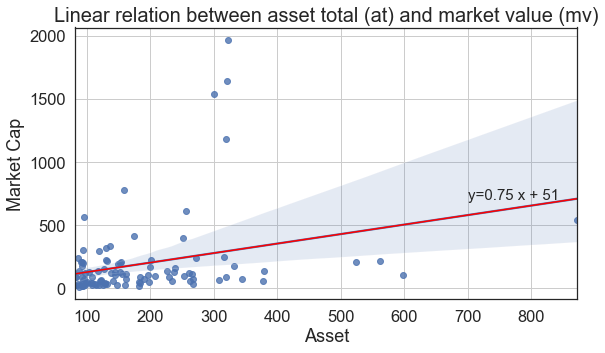

In [17]:
sns.set(font_scale=1.5)
sns.set_style('white')
ax= sns.regplot(data= df, x='at', y= 'mv')
ax.figure.set_size_inches(9, 5)
ax.grid()
ax.set_title("Linear relation between asset total (at) and market value (mv)"
             , fontsize= 20)
ax.set_xlabel("Asset")
ax.set_ylabel("Market Cap")
plt.plot(x, fit[0] * x + fit[1], color='red')
plt.annotate('y={0:.2f} x + {1:.0f}'.format(fit[0], fit[1]), xy= (700, 700), fontsize=15)
plt.show()

-------------------